
# Project: TMDB movie dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. 

### Questions:
* Which genres are most popular from year to year? 
* What kinds of properties are associated with movies that have high revenues?


In [1]:
# load all the packages required 

import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling


### General Properties

* Rows = 10866
* Columns = 21
* All the data types are relevant


### Data Cleaning:

* Dropped all duplicate records
* Null vales present in genres are removed to analyse the popular genres from year to year
* All the other columns with null values are not required for this analysis, so no modifications are made on these. 

In [2]:
df = pd.read_csv('tmdb-movies.csv')

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# get all info about the data and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
# check for duplicates
sum(df.duplicated())

1

In [5]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [6]:
# confirm that there are no duplicates 
sum(df.duplicated())

0

In [7]:
# check for null values 
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
# drop the null values 
df.dropna(subset = ['genres'], inplace=True)

In [9]:
# confirm that there are no null values in the required columns
df.isnull().sum()

id                         0
imdb_id                    8
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      75
homepage                7911
director                  42
tagline                 2806
keywords                1475
overview                   3
runtime                    0
genres                     0
production_companies    1016
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
# Load your data and print out a few lines
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis


### Question 1. Which genres are most popular from year to year?

#### Steps for analysis:
* To get the popular genre from year to year, I took the genre column and split it as there are multiple genres for each movie. To split them we used get_dummies method as it will create a new column for each genre. 
* Once the genres are in separate columns, using pandas concat method I added these columns to the cleaned data file and dropped all the columns which are not required for this analysis. 
* Finally to get most popular genres from year to year, I grouped the data by year and got the max mean and popular genre for the year using max and id max functions.


In [11]:
df['genres'].head()
# as there are multiple genres in single column, we have to split them.

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
Name: genres, dtype: object

In [12]:
# split the genres columns with multiple genres 
# get_dummies will give 1 if there is a genre present for that movie, which will help us to count them easily

df1 = df['genres'].str.get_dummies('|')
df_genres = pd.concat([df, df1], axis=1)
df_genres

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,0,0,0,0,0,1,0,1,0,0
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,0,0,0,0,0,1,0,1,0,0
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,0,0,0,0,0,1,0,1,0,0
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,0,0,0,0,0,1,0,0,0,0
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,0,0,0,0,0,0,0,1,0,0
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,0,0,0,0,0,0,0,1,0,1
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,0,0,0,0,0,1,0,1,0,0
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,0,0,0,0,0,1,0,0,0,0
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,0,0,0,0,0,0,0,0,0,0
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# drop all the columns which are not required for this question
df_genres.drop(['popularity','homepage','director','tagline','overview','cast','budget','revenue','imdb_id','keywords','runtime','id','production_companies','release_date','vote_count','vote_average','budget_adj','revenue_adj','genres'], axis=1, inplace=True)
df_genres.head()

,original_title,release_year,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,Jurassic World,2015,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,Mad Max: Fury Road,2015,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,Insurgent,2015,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,Star Wars: The Force Awakens,2015,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Furious 7,2015,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
# group by year and get mean for all the genres in that year

df_genres_year = df_genres.groupby('release_year').mean()

In [15]:
# get the max mean and the name of the genre 
df_genres_year['popular_genre'] = df_genres_year.idxmax(axis=1)
df_genres_year['max_mean'] = df_genres_year.max(axis=1)

# write it to new csv file for future 
df_genres_year.to_csv('pop_genre_year.csv')

In [16]:
# resd the csv file
df_genres_popularbyyear = pd.read_csv('pop_genre_year.csv')
df_genres_popularbyyear.head()

,release_year,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,popular_genre,max_mean
0,1960,0.250000,0.156250,0.000000,0.250000,0.062500,0.0,0.406250,0.093750,0.062500,...,0.031250,0.000000,0.187500,0.093750,0.0,0.187500,0.062500,0.187500,Drama,0.406250
1,1961,0.225806,0.193548,0.032258,0.322581,0.064516,0.0,0.516129,0.161290,0.064516,...,0.064516,0.032258,0.225806,0.129032,0.0,0.000000,0.064516,0.096774,Drama,0.516129
2,1962,0.250000,0.218750,0.000000,0.156250,0.093750,0.0,0.656250,0.062500,0.031250,...,0.031250,0.125000,0.156250,0.062500,0.0,0.218750,0.093750,0.093750,Drama,0.656250
3,1963,0.117647,0.205882,0.029412,0.382353,0.117647,0.0,0.382353,0.088235,0.058824,...,0.000000,0.176471,0.235294,0.058824,0.0,0.294118,0.029412,0.058824,Comedy,0.382353
4,1964,0.119048,0.119048,0.047619,0.380952,0.238095,0.0,0.476190,0.095238,0.095238,...,0.119048,0.095238,0.214286,0.095238,0.0,0.214286,0.071429,0.023810,Drama,0.476190


In [17]:
# take only the max mean genres, max_mean, and popular_genre
df_genres_popularbyyear = df_genres_popularbyyear[['release_year','Comedy','Drama','popular_genre']]
df_genres_popularbyyear.head(10)

,release_year,Comedy,Drama,popular_genre
0,1960,0.250000,0.406250,Drama
1,1961,0.322581,0.516129,Drama
2,1962,0.156250,0.656250,Drama
3,1963,0.382353,0.382353,Comedy
4,1964,0.380952,0.476190,Drama
5,1965,0.200000,0.571429,Drama
6,1966,0.347826,0.347826,Comedy
7,1967,0.425000,0.400000,Comedy
8,1968,0.230769,0.512821,Drama
9,1969,0.387097,0.419355,Drama


 This shows that all the popular genres from year to year are drama and comedy. So we took only the drama and comedy mean columns and plotted to see which is popular from year to year.

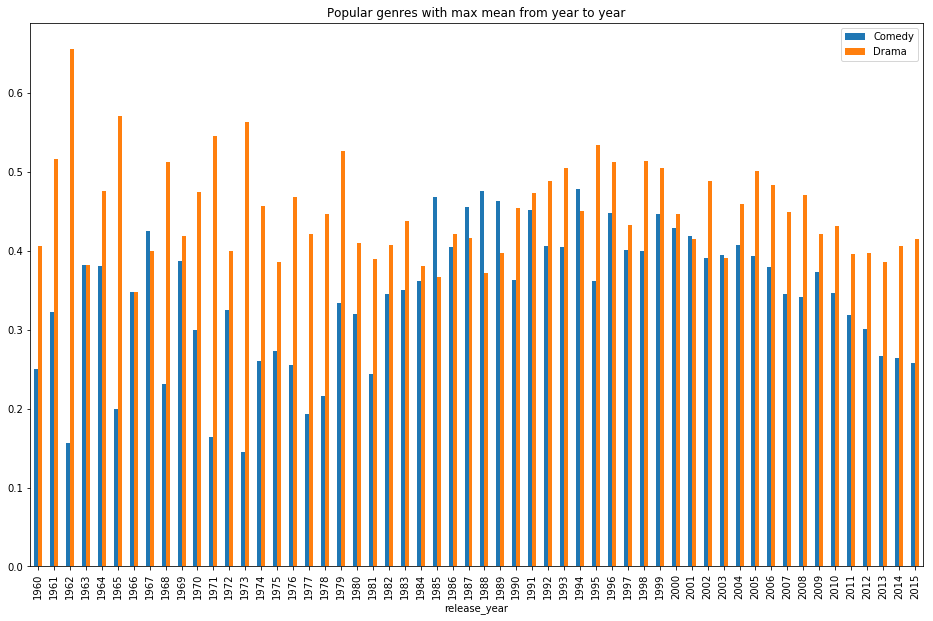

In [18]:
# plot for popular genres from year to year
df_genres_popularbyyear.plot.bar(x='release_year',title = 'Popular genres with max mean from year to year', figsize=(16,10));

As per the above bar chart, it shows that the drama is the most popular genre. comedy genre has been gaining popularity from 1985.

### Question 2  What kinds of properties are associated with movies that have high revenues?

#### Steps for analysis:

* To start with, I sorted the data as per revenue adjusted column and took only top 50 high revenue movies.
* Selected few columns and dropped all other columns to compare and see if they are associated with high revenues 
* sorted the data based on revenue and plotted the graphs 

In [19]:
# Sort the dataset to get top 50 movies with high revenues

df.sort_values('revenue_adj',ascending=False).head(50)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
1329,11,tt0076759,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,http://www.starwars.com/films/star-wars-episod...,George Lucas,"A long time ago in a galaxy far, far away...",...,Princess Leia is captured and held hostage by ...,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,4428,7.9,1977,3.957559e+07,2.789712e+09
5231,597,tt0120338,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,http://www.titanicmovie.com/menu.html,James Cameron,Nothing on Earth could come between them.,...,"84 years later, a 101-year-old woman named Ros...",194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09
10594,9552,tt0070047,2.010733,8000000,441306145,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,http://theexorcist.warnerbros.com/,William Friedkin,Something almost beyond comprehension is happe...,...,12-year-old Regan MacNeil begins to adapt an e...,122,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,12/26/73,1113,7.2,1973,3.928928e+07,2.167325e+09
9806,578,tt0073195,2.563191,7000000,470654000,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,http://www.jaws25.com/,Steven Spielberg,Don't go in the water.,...,An insatiable great white shark terrorizes the...,124,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,6/18/75,1415,7.3,1975,2.836275e+07,1.907006e+09
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
8889,601,tt0083866,2.900556,10500000,792910554,E.T. the Extra-Terrestrial,Henry Thomas|Drew Barrymore|Robert MacNaughton...,http://www.et20.com/,Steven Spielberg,He is afraid. He is alone. He is three million...,...,A science fiction fairytale about an extra-ter...,115,Science Fiction|Adventure|Family|Fantasy,Universal Pictures|Amblin Entertainment,4/3/82,1830,7.2,1982,2.372625e+07,1.791694e+09
8094,1642,tt0113957,1.136610,22000000,1106279658,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,NaN,Irwin Winkler,Her driver's license. Her credit cards. Her ba...,...,Angela Bennett is a freelance software enginee...,114,Crime|Drama|Mystery|Thriller|Action,Columbia Pictures,7/28/95,201,5.6,1995,3.148127e+07,1.583050e+09
10110,12230,tt0055254,2.631987,4000000,215880014,One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,NaN,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,The Canine Caper of the Century,...,When a litter of dalmatian puppies are abducte...,79,Adventure|Animation|Comedy|Family,Walt Disney Productions,1/25/61,913,6.6,1961,2.917944e+07,1.574815e+09
4361,24428,tt0848228,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,http://marvel.com/avengers_movie/,Joss Whedon,Some assembly required.,...,When an unexpected enemy emerges and threatens...,143,Science Fiction|Action|Adventure,Marvel Studios,4/25/12,8903,7.3,2012,2.089437e+08,1.443191e+09


In [20]:
# take only the required columns to analyse the properties for high revenues
df2 = df[['popularity','revenue_adj','vote_average','runtime','original_title']]
df2.head()

,popularity,revenue_adj,vote_average,runtime,original_title
0,32.985763,1.392446e+09,6.5,124,Jurassic World
1,28.419936,3.481613e+08,7.1,120,Mad Max: Fury Road
2,13.112507,2.716190e+08,6.3,119,Insurgent
3,11.173104,1.902723e+09,7.5,136,Star Wars: The Force Awakens
4,9.335014,1.385749e+09,7.3,137,Furious 7


In [21]:
# sort the data as per revenue_adj and write it to new csv file 
df_high_revenues = df2.sort_values('revenue_adj',ascending=False).head(50)
df_high_revenues.to_csv('high_revenue_properties.csv',index=False)

In [22]:
#read the csv file 
df_revenue_prop = pd.read_csv('high_revenue_properties.csv')
df_revenue_prop.head()

,popularity,revenue_adj,vote_average,runtime,original_title
0,9.432768,2.827124e+09,7.1,162,Avatar
1,12.037933,2.789712e+09,7.9,121,Star Wars
2,4.355219,2.506406e+09,7.3,194,Titanic
3,2.010733,2.167325e+09,7.2,122,The Exorcist
4,2.563191,1.907006e+09,7.3,124,Jaws


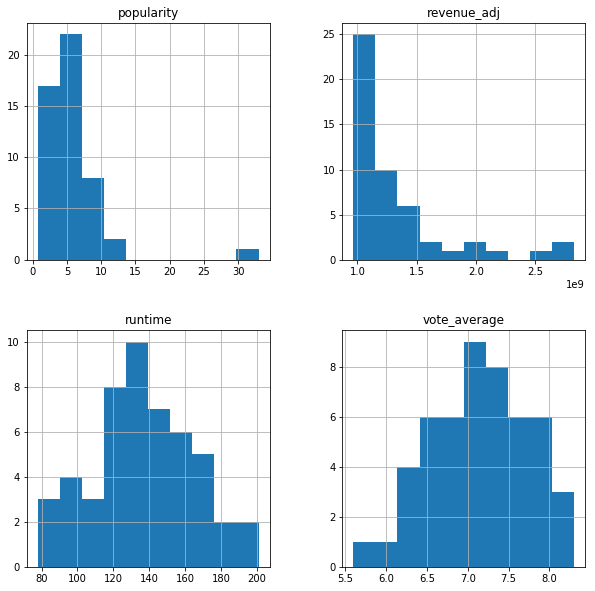

In [23]:
df_revenue_prop.hist(figsize=(10,10));

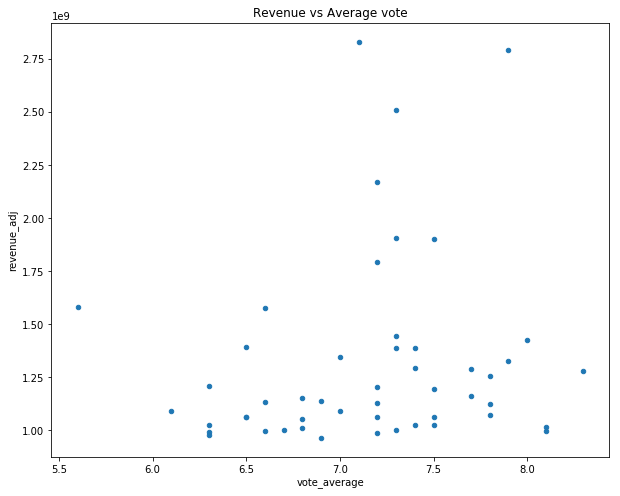

In [24]:
df_revenue_prop.plot(x='vote_average',y='revenue_adj',kind='scatter', title = 'Revenue vs Average vote', figsize=(10,8));


 The above graph shows that it is positive skewed. Which means that the movies with high revenues have higher ratings. 

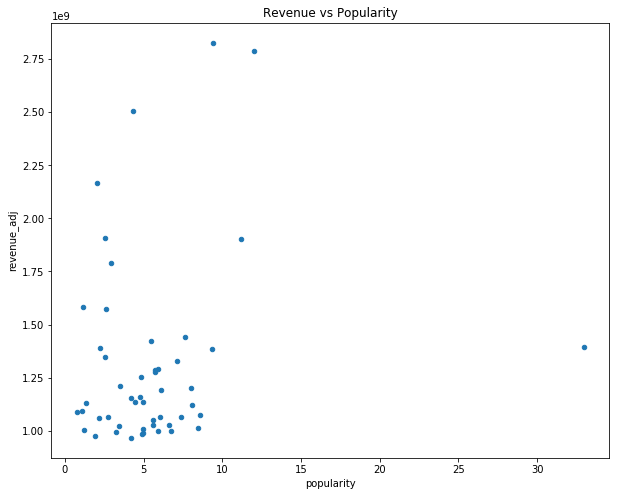

In [25]:
df_revenue_prop.plot(x='popularity',y='revenue_adj', kind='scatter', title = 'Revenue vs Popularity', figsize=(10,8));


The above graph shows us that it is very much right skewed and the movies with high revenues have rating less than 10, which means the high revenue movies are the most popular movies. 

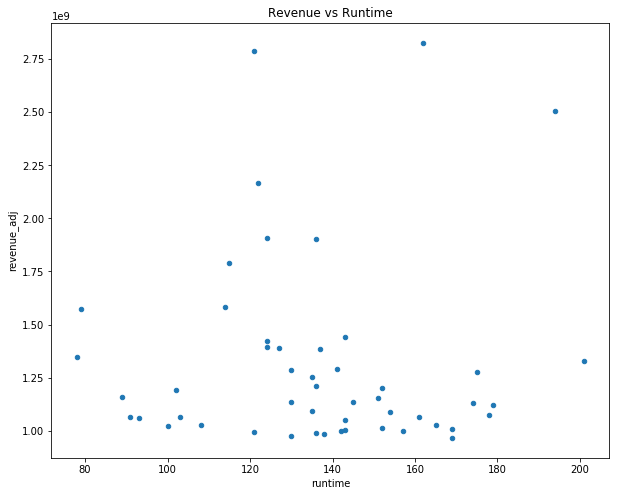

In [26]:
df_revenue_prop.plot(x='runtime', y='revenue_adj', kind='scatter', title = 'Revenue vs Runtime', figsize=(10,8));


   As per above graph, all the movies with high revenues are having runtime around 140 minutes. 

<a id='limitations'></a>
## Limitations

* Since some of the movies are associated to multiple genres, the numbers might be skewed little bit because of dummy genres
* Impact of economy on the budget and revenue are not considered in this dataset. 

<a id='conclusions'></a>
## Conclusions

* From the exploratory data analysis of this dataset, we understood that the most popular genres are comedy and drama from year over year since 1960.
* The properties associated with the high revenue(adjusted) are average vote, popularity, and runtime. 
